In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-08-10 23:30:46.803984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 23:30:46.928219: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-10 23:30:47.415349: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2023-08-10 23:30:47.415415: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

60000 10000 (28, 28)


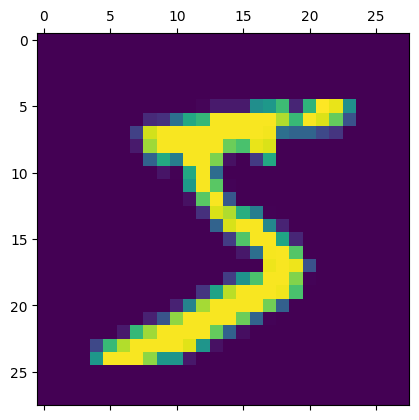

In [3]:
print(len(X_train),len(X_test),X_train[0].shape,)
plt.matshow(X_train[0])

In [4]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


2023-08-10 23:30:48.555999: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-10 23:30:48.579869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-10 23:30:48.580036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-10 23:30:48.580495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

 187/1875 [=>............................] - ETA: 1s - loss: 27.4652 - accuracy: 0.6681  

2023-08-10 23:30:49.852863: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 2s 782us/step - loss: 9.5024 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 1s 764us/step - loss: 6.1108 - accuracy: 0.8776
Epoch 3/5
1875/1875 [==============================] - 1s 799us/step - loss: 5.6738 - accuracy: 0.8823
Epoch 4/5
1875/1875 [==============================] - 2s 801us/step - loss: 5.5003 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 1s 778us/step - loss: 5.3279 - accuracy: 0.8868


In [6]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 872us/step - loss: 5.5113 - accuracy: 0.8983


[5.5113301277160645, 0.8982999920845032]

In [7]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 [==============================] - 0s 533us/step


Text(95.72222222222221, 0.5, 'Truth')

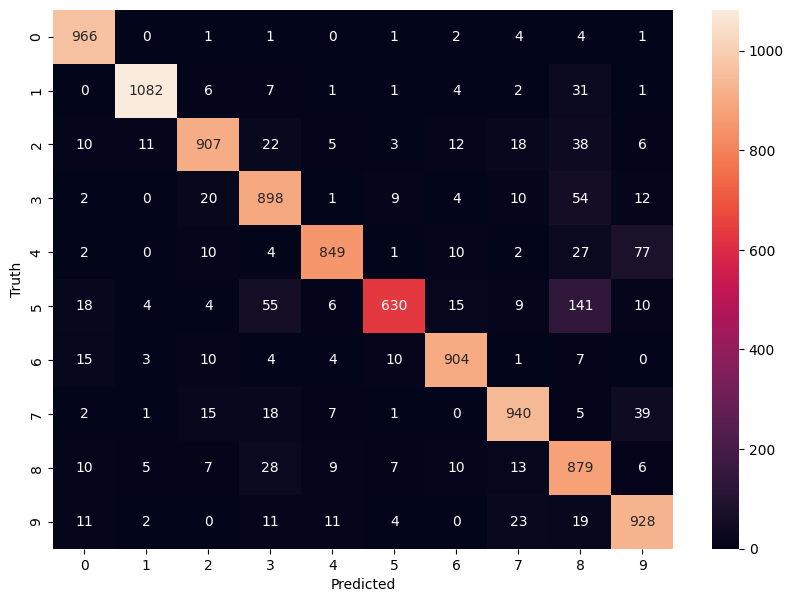

In [8]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 888us/step - loss: 2.6469 - accuracy: 0.8526
Epoch 2/5
1875/1875 [==============================] - 2s 918us/step - loss: 0.3838 - accuracy: 0.9064
Epoch 3/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.2783 - accuracy: 0.9280
Epoch 4/5
1875/1875 [==============================] - 2s 857us/step - loss: 0.2469 - accuracy: 0.9362
Epoch 5/5
1875/1875 [==============================] - 2s 870us/step - loss: 0.2339 - accuracy: 0.9393


In [10]:

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 850us/step - loss: 0.3007 - accuracy: 0.9350


[0.3007231056690216, 0.9350000023841858]

313/313 [==============================] - 0s 566us/step


Text(95.72222222222221, 0.5, 'Truth')

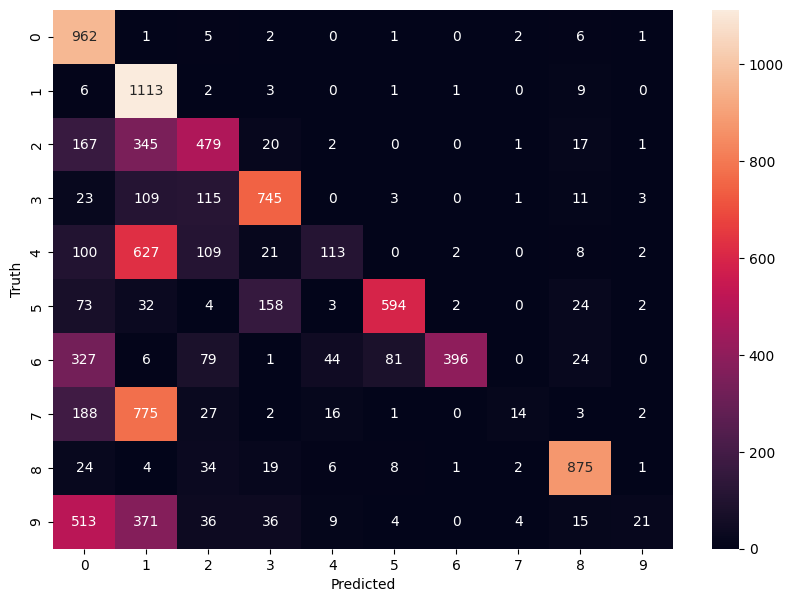

In [11]:

y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 834us/step - loss: 2.6230 - accuracy: 0.8430
Epoch 2/100
1875/1875 [==============================] - 2s 943us/step - loss: 0.4249 - accuracy: 0.8992
Epoch 3/100
1875/1875 [==============================] - 2s 869us/step - loss: 0.3101 - accuracy: 0.9227
Epoch 4/100
1875/1875 [==============================] - 2s 869us/step - loss: 0.2550 - accuracy: 0.9338
Epoch 5/100
1875/1875 [==============================] - 2s 858us/step - loss: 0.2406 - accuracy: 0.9380
Epoch 6/100
1875/1875 [==============================] - 2s 862us/step - loss: 0.2252 - accuracy: 0.9420
Epoch 7/100
1875/1875 [==============================] - 2s 883us/step - loss: 0.2099 - accuracy: 0.9456
Epoch 8/100
1875/1875 [==============================] - 2s 867us/step - loss: 0.2098 - accuracy: 0.9467
Epoch 9/100
1875/1875 [==============================] - 2s 866us/step - loss: 0.1931 - accuracy: 0.9510
Epoch 10/100
1875/1875 [==============================]

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 862us/step - loss: 1.0030 - accuracy: 0.9463


[1.0029898881912231, 0.9463000297546387]